In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model
from keras.losses import mean_squared_error
from keras_contrib.losses import DSSIMObjective

from keras import backend as K

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



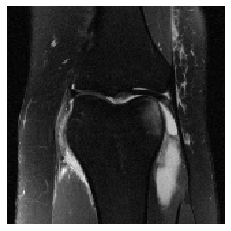

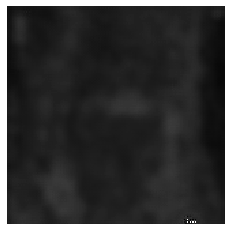

In [2]:
from dc_aae_3 import AdversarialAutoencoder

encoder = load_model('aae_mse_6/Models/encoder_aae_ssim_19.h5')
generator = load_model('aae_mse_6/Models/decoder_aae_ssim_19.h5')

aae = AdversarialAutoencoder()

train_generator = aae.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, under, _ = next(train_generator)

z = encoder.predict(under)
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


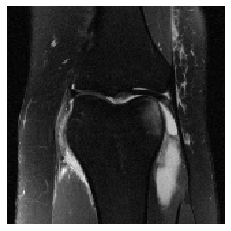

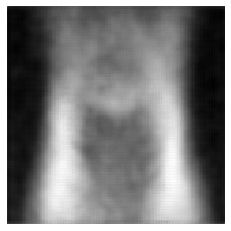

In [16]:
from dc_vae_3 import VariationalAutoencoder

encoder = load_model('vae_mse_3/Models/encoder_vae_19.h5')
generator = load_model('vae_mse_3/Models/decoder_vae_19.h5')

vae = VariationalAutoencoder()

train_generator = vae.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    under, imgs = next(train_generator)
    imgs = imgs[0]
    
params = encoder.predict(under)

mu = params[:, :vae.latent_dim]
log_var = params[:, vae.latent_dim:]

z = mu + (np.random.normal(0,1,mu.shape) * np.exp(.5 * log_var))
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

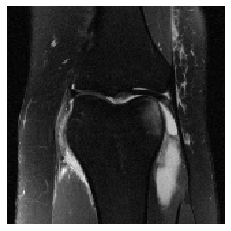

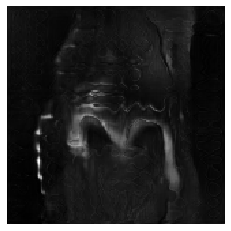

In [6]:
from bigan import BiGAN, generate_keras_input

bi = BiGAN()

bi.load(5)

train_generator = generate_keras_input('train')

mse = []
ssim = []

for i in range(100):
    imgs, under, _ = next(train_generator)
    
    
z = bi.GAN.E.predict(under, batch_size = 16)
imgs_rec = bi.GAN.G.predict(z, batch_size = 16)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

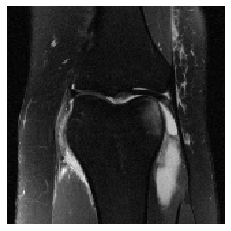

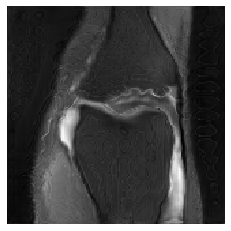

In [7]:
from bigan import BiGAN, generate_keras_input

bi = BiGAN()

bi.load(5)

train_generator = generate_keras_input('train')

mse = []
ssim = []

for i in range(100):
    imgs, under, _ = next(train_generator)
    
    
z = bi.GAN.EE.predict(under, batch_size = 16)
imgs_rec = bi.GAN.GE.predict(z, batch_size = 16)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

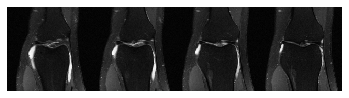

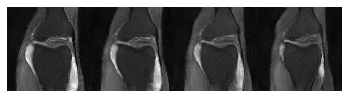

In [2]:
from bigan import BiGAN, generate_keras_input

bi = BiGAN()

bi.load(5)

train_generator = generate_keras_input('val')

mse = []
ssim = []

for i in range(200):
    imgs, under, _ = next(train_generator)
    
imgs = imgs[4:8,:,:,:]    
under = under[4:8,:,:,:]    

z = bi.GAN.EE.predict(under, batch_size = 16)
imgs_rec = bi.GAN.GE.predict(z, batch_size = 16)

imgs = np.concatenate(imgs, 1)[:,:,0]

imgs_rec = np.concatenate(imgs_rec, 1)[:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

In [12]:
x = np.concatenate(imgs, 1)
print(x.shape)

(160, 2560, 1)
